In [1]:
from astrodbkit import astrodb
import pandas as pd 
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
import numpy as np

In [2]:
db = astrodb.Database("bdnycdev1.db")

Database ready for use


In [3]:
db.info()


Database path: bdnycdev1.db 
SQL path: bdnycdev1.sql

Database Inventory
SOURCES: 1938
CHANGELOG: 205
DATA_REQUESTS: 27
IGNORE: 122
INSTRUMENTS: 54
MODES: 7
PARALLAXES: 436
PHOTOMETRY: 10358
PROPER_MOTIONS: 599
PUBLICATIONS: 607
RADIAL_VELOCITIES: 143
SPECTRA: 3614
SPECTRAL_TYPES: 1511
SYSTEMS: 15
TELESCOPES: 38
VERSIONS: 2


In [4]:
db.help()


The astrodb.Database class, hereafter db, provides a variety of methods to interact with a SQLite database file.
Docstrings are available for all methods and can be accessed in the usual manner; eg, help(db.query).
We list a few key methods below.

    Methods to explore the database:
    * db.query() - send SELECT commands to the database. Returns results in a variety of formats
    * db.info() - get a quick summary of the contents of the database
    * db.schema() - quickly examine the columns, types, etc of a specified table
    * db.search() - search through a table to find entries matching the criteria
    * db.inventory() - search for all entries that match the specified source_id
    * db.references() - search for all entries in all tables matching the criteria. Useful for publications

    Methods to modify the database:
    * db.add_data() - add data to an existing table, either by providing a file or by providing the data itself
    * db.table() - create or modify tables in 

In [5]:
help(db.query)

Help on method query in module astrodbkit.astrodb:

query(SQL, params='', fmt='array', fetch='all', unpack=False, export='', verbose=False, use_converters=True) method of astrodbkit.astrodb.Database instance
    Returns data satisfying the provided **SQL** script. Only SELECT or PRAGMA statements are allowed.
    Results can be returned in a variety of formats.
    For example, to extract the ra and dec of all entries in SOURCES in astropy.Table format one can write:
        data = db.query('SELECT ra, dec FROM sources', fmt='table')
    
    For more general SQL statements, see the modify() method.
    
    Parameters
    ----------
    SQL: str
        The SQL query to execute
    params: sequence
        Mimics the native parameter substitution of sqlite3
    fmt: str
        Returns the data as a dictionary, array, astropy.table, or pandas.Dataframe
        given 'dict', 'array', 'table', or 'pandas'
    fetch: str
        String indicating whether to return **all** results or just

In [6]:
db.query("SELECT * FROM telescopes LIMIT 5", fmt = "pandas")

,id,name,publication_shortname
0,1,SDSS,None
1,2,2MASS,None
2,3,WISE,None
3,4,UKIRT,None
4,5,HST,None


In [29]:
NIR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, \
dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='NIR' \
order by source_id", fmt="pandas")



In [30]:
NIR_spectraltype.head()

,dec,ra,shortname,source_id,spectral_type
0,-4.105361,352.756710,2331-0406,3,8.0
1,-37.628833,15.712500,0102-3737,107,8.0
2,-11.012096,358.021136,2352-1100,146,8.0
3,5.150606,289.240092,1916+0508,300,8.0
4,20.728167,231.558541,1526+2043,353,15.0


In [9]:
IR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='IR' order by source_id", fmt="pandas")
OPT_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, ra, dec from sources join spectral_types on sources.id=spectral_types.source_id where regime='OPT' order by source_id", fmt="pandas")


In [10]:
IR_spectraltype.head()

,dec,ra,shortname,source_id,spectral_type
0,-1.28056,202.954,1331-0116,2,20.0
1,10.5331,222.107,1448+1031,4,14.0
2,10.5331,222.107,1448+1031,4,13.5
3,-39.5483,181.889,1207-3932,11,8.5
4,0.734611,342.473,2249+0044,14,11.0


In [11]:
OPT_spectraltype.head()

,dec,ra,shortname,source_id,spectral_type
0,18.333275,254.709737,1658+1820,1,10.0
1,-1.280556,202.953870,1331-0116,2,16.0
2,10.533056,222.106791,1448+1031,4,14.0
3,10.533056,222.106791,1448+1031,4,13.5
4,-9.766389,220.404834,1441-0945,6,10.5


In [12]:
print(len(IR_spectraltype))
print(len(OPT_spectraltype))

503
483


In [13]:
NIR_spectraltype["spectral_type"].head()

0     8.0
1     8.0
2     8.0
3     8.0
4    15.0
Name: spectral_type, dtype: float64

In [14]:
IR_spectraltype["spectral_type"].head()

0    20.0
1    14.0
2    13.5
3     8.5
4    11.0
Name: spectral_type, dtype: object

In [15]:
#float(IR_spectraltype["spectral_type"])

In [16]:
type(IR_spectraltype["spectral_type"])

pandas.core.series.Series

In [17]:
for i in IR_spectraltype["spectral_type"]:
    if type(i) == object:
        float(ic)

In [18]:
#SQUASH DIS BUG!: complete this code to convert our strings into floats (aka decimals)
for i in IR_spectraltype["spectral_type"]:
    try:
        float(i)
    except ValueError:
        print(i , "cannot be converted")

L7+L8 cannot be converted


In [19]:
newIR_spectral_types = []
for i in IR_spectraltype["spectral_type"]:
    try:
        newIR_spectral_types.append(float(i))
    except ValueError:
        print(i , "cannot be converted")

L7+L8 cannot be converted


In [20]:
len(newIR_spectral_types)

502

In [21]:
newOPT_spectral_types = []
for i in OPT_spectraltype["spectral_type"]:
    try:
        newOPT_spectral_types.append(float(i))
    except ValueError:
        print(i , "cannot be converted")

L1-L4 cannot be converted
0355-type cannot be converted


In [22]:
len(newOPT_spectral_types)

481

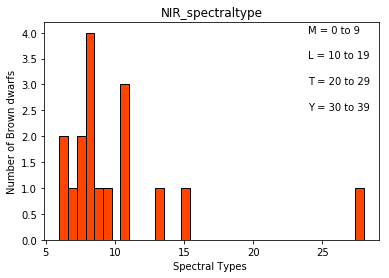

In [23]:
plt.hist(NIR_spectraltype["spectral_type"], 35, color = "orangered", edgecolor = "black")
plt.title("NIR_spectraltype")
plt.xlabel("Spectral Types ")
plt.ylabel("Number of Brown dwarfs")
plt.annotate("M = 0 to 9", 
           xy = (24, 4.0))
plt.annotate("L = 10 to 19", 
             xy = (24, 3.5))
plt.annotate("T = 20 to 29", 
            xy = (24, 3.0))
plt.annotate("Y = 30 to 39", 
           xy = (24, 2.5))
plt.savefig("Plots/NIR_spectraltype")
plt.show()

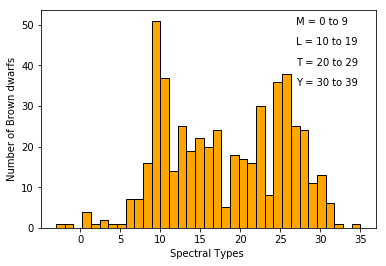

In [24]:
plt.hist(newIR_spectral_types, 35, color = "orange", edgecolor = "black")
plt.xlabel("Spectral Types ")
plt.ylabel("Number of Brown dwarfs")
plt.annotate("M = 0 to 9", 
            xy = (27, 50))
plt.annotate("L = 10 to 19", 
            xy = (27, 45))
plt.annotate("T = 20 to 29", 
            xy = (27, 40))
plt.annotate("Y = 30 to 39", 
            xy = (27, 35))
plt.savefig("Plots/IR_spectral_types")
plt.show()

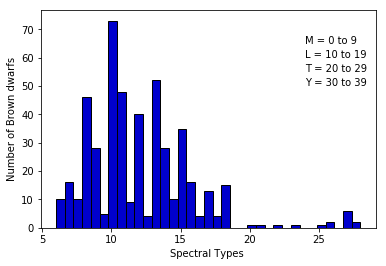

In [25]:
plt.hist(newOPT_spectral_types, 35, color = "mediumblue", edgecolor = "black")
plt.xlabel("Spectral Types ")
plt.ylabel("Number of Brown dwarfs")
plt.annotate("M = 0 to 9", 
            xy = (24, 65))
plt.annotate("L = 10 to 19", 
            xy = (24, 60))
plt.annotate("T = 20 to 29", 
            xy = (24, 55))
plt.annotate("Y = 30 to 39", 
            xy = (24, 50))
plt.savefig("Plots/OPT_spectral_types")
plt.show()

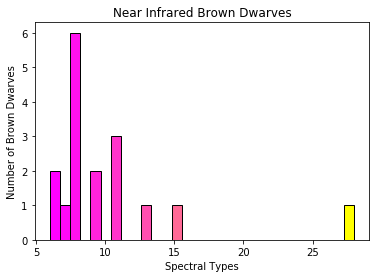

In [26]:
plt.title("Near Infrared Brown Dwarves")
plt.ylabel("Number of Brown Dwarves")
plt.xlabel("Spectral Types")
cm = plt.cm.get_cmap('spring')
# Plot histogram.
n, bins, patches = plt.hist(NIR_spectraltype["spectral_type"], 30, edgecolor = "black")
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.show()

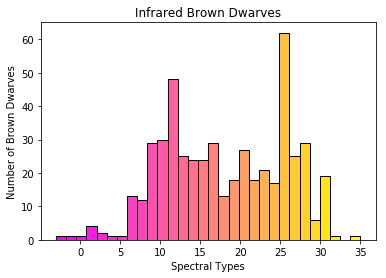

In [27]:
plt.title("Infrared Brown Dwarves")
plt.ylabel("Number of Brown Dwarves")
plt.xlabel("Spectral Types")
cm = plt.cm.get_cmap('spring')
# Plot histogram.
n, bins, patches = plt.hist(newIR_spectral_types, 30, edgecolor = "black")
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.show()

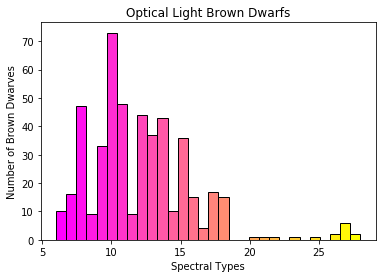

In [28]:
plt.title("Optical Light Brown Dwarfs")
plt.ylabel("Number of Brown Dwarves")
plt.xlabel("Spectral Types")
cm = plt.cm.get_cmap('spring')
# Plot histogram.
n, bins, patches = plt.hist(newOPT_spectral_types, 30, edgecolor = "black")
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.show()

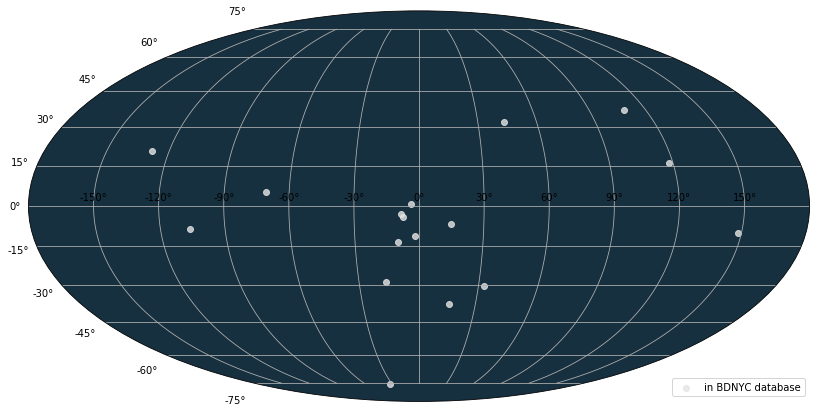

In [29]:
# Plotting coordinates
# ===============================================
# converting BDNYC database coordinates for plot
NIR_ra = coord.Angle(pd.to_numeric(NIR_spectraltype["ra"]).fillna(np.nan).values*u.degree)
NIR_ra = NIR_ra.wrap_at(180*u.degree)
NIR_dec = coord.Angle(pd.to_numeric(NIR_spectraltype["dec"]).fillna(np.nan).values*u.degree)
#      converting matches csv coordinates
#     matches_ra = coord.Angle(matches["RA"].values*u.degree)
#     matches_ra = matches_ra.wrap_at(180*u.degree)
#     matches_dec = coord.Angle(matches["DEC"].values*u.degree)
#     converting new_objects csv coordinates
#     new_objects_ra = coord.Angle(new_objects["RA"].values*u.degree)
#     new_objects_ra = new_objects_ra.wrap_at(180*u.degree)
#     new_objects_dec = coord.Angle(new_objects["DEC"].values*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor("#17303F")
plt.grid(True)
ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#E5E5E5", alpha=.8, edgecolors="face", label="in BDNYC database")
# ax.scatter(matches_ra.radian, matches_dec.radian, color="#F24333", label='in BDNYC database and GAIA dataset')
# ax.scatter(new_objects_ra.radian, new_objects_dec.radian, color="#E3B505", label='in GAIA dataset')
ax.legend(loc=4)
plt.show()

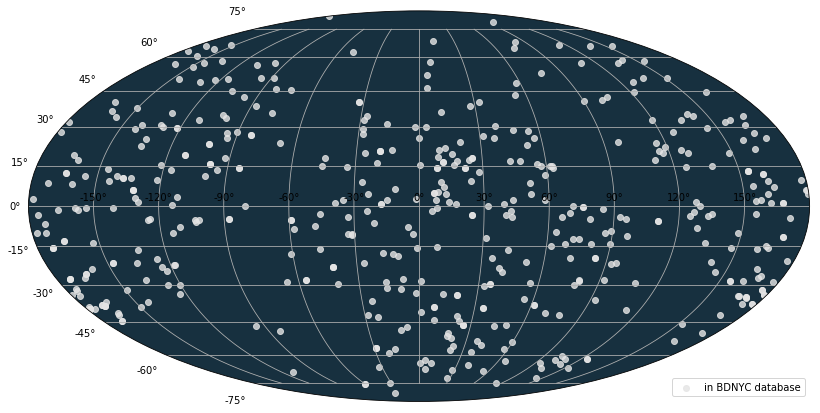

In [34]:
# Plotting coordinates
# ===============================================
# converting BDNYC database coordinates for plot
IR_ra = coord.Angle(pd.to_numeric(IR_spectraltype["ra"]).fillna(np.nan).values*u.degree)
IR_ra = IR_ra.wrap_at(180*u.degree)
IR_dec = coord.Angle(pd.to_numeric(IR_spectraltype["dec"]).fillna(np.nan).values*u.degree)
#      converting matches csv coordinates
#     matches_ra = coord.Angle(matches["RA"].values*u.degree)
#     matches_ra = matches_ra.wrap_at(180*u.degree)
#     matches_dec = coord.Angle(matches["DEC"].values*u.degree)
#     converting new_objects csv coordinates
#     new_objects_ra = coord.Angle(new_objects["RA"].values*u.degree)
#     new_objects_ra = new_objects_ra.wrap_at(180*u.degree)
#     new_objects_dec = coord.Angle(new_objects["DEC"].values*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor("#17303F")
plt.grid(True)
ax.scatter(IR_ra.radian, IR_dec.radian, color="#E5E5E5", alpha=.8, edgecolors="face", label="in BDNYC database")
# ax.scatter(matches_ra.radian, matches_dec.radian, color="#F24333", label='in BDNYC database and GAIA dataset')
# ax.scatter(new_objects_ra.radian, new_objects_dec.radian, color="#E3B505", label='in GAIA dataset')
ax.legend(loc=4)
plt.show()

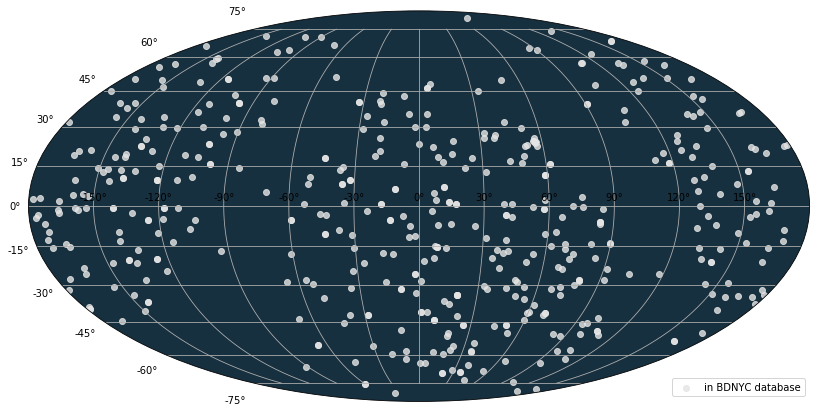

In [35]:
# Plotting coordinates
# ===============================================
# converting BDNYC database coordinates for plot
OPT_ra = coord.Angle(pd.to_numeric(OPT_spectraltype["ra"]).fillna(np.nan).values*u.degree)
OPT_ra = OPT_ra.wrap_at(180*u.degree)
OPT_dec = coord.Angle(pd.to_numeric(OPT_spectraltype["dec"]).fillna(np.nan).values*u.degree)
#      converting matches csv coordinates
#     matches_ra = coord.Angle(matches["RA"].values*u.degree)
#     matches_ra = matches_ra.wrap_at(180*u.degree)
#     matches_dec = coord.Angle(matches["DEC"].values*u.degree)
#     converting new_objects csv coordinates
#     new_objects_ra = coord.Angle(new_objects["RA"].values*u.degree)
#     new_objects_ra = new_objects_ra.wrap_at(180*u.degree)
#     new_objects_dec = coord.Angle(new_objects["DEC"].values*u.degree)
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor("#17303F")
plt.grid(True)
ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5", alpha=.8, edgecolors="face", label="in BDNYC database")
# ax.scatter(matches_ra.radian, matches_dec.radian, color="#F24333", label='in BDNYC database and GAIA dataset')
# ax.scatter(new_objects_ra.radian, new_objects_dec.radian, color="#E3B505", label='in GAIA dataset')
ax.legend(loc=4)
plt.show()

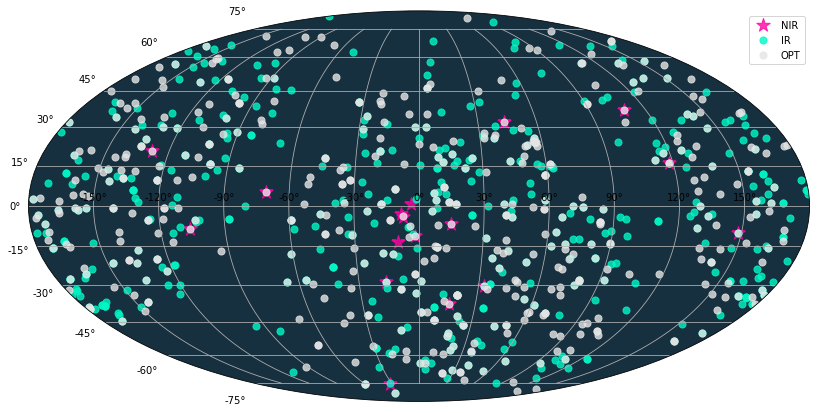

In [108]:
# Plotting coordinates
# ===============================================
# converting BDNYC database coordinates for plot
NIR_ra = coord.Angle(pd.to_numeric(NIR_spectraltype["ra"]).fillna(np.nan).values*u.degree)
NIR_ra = NIR_ra.wrap_at(180*u.degree)
NIR_dec = coord.Angle(pd.to_numeric(NIR_spectraltype["dec"]).fillna(np.nan).values*u.degree)

IR_ra = coord.Angle(pd.to_numeric(IR_spectraltype["ra"]).fillna(np.nan).values*u.degree)
IR_ra = IR_ra.wrap_at(180*u.degree)
IR_dec = coord.Angle(pd.to_numeric(IR_spectraltype["dec"]).fillna(np.nan).values*u.degree)

OPT_ra = coord.Angle(pd.to_numeric(OPT_spectraltype["ra"]).fillna(np.nan).values*u.degree)
OPT_ra = OPT_ra.wrap_at(180*u.degree)
OPT_dec = coord.Angle(pd.to_numeric(OPT_spectraltype["dec"]).fillna(np.nan).values*u.degree)


fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor("#17303F")
plt.grid(True)
ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#FF03A3", alpha=.8, edgecolors="face", marker = "*", 
           label="NIR", s = 200)
ax.scatter(IR_ra.radian, IR_dec.radian, color="#01F7C6", alpha=.8, edgecolors="face", label="IR", s = 50)
ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5", alpha=.8, edgecolors="face", label="OPT", s = 50)

ax.legend(loc= 1)
plt.savefig("Plots/bdnyc_in_space.png", dpi = 1500)
plt.show()



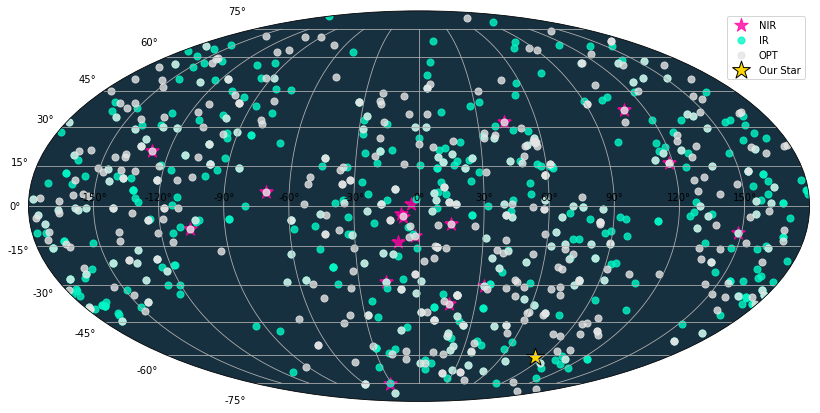

In [106]:
# Plotting coordinates
# ===============================================
# converting BDNYC database coordinates for plot
NIR_ra = coord.Angle(pd.to_numeric(NIR_spectraltype["ra"]).fillna(np.nan).values*u.degree)
NIR_ra = NIR_ra.wrap_at(180*u.degree)
NIR_dec = coord.Angle(pd.to_numeric(NIR_spectraltype["dec"]).fillna(np.nan).values*u.degree)

IR_ra = coord.Angle(pd.to_numeric(IR_spectraltype["ra"]).fillna(np.nan).values*u.degree)
IR_ra = IR_ra.wrap_at(180*u.degree)
IR_dec = coord.Angle(pd.to_numeric(IR_spectraltype["dec"]).fillna(np.nan).values*u.degree)

OPT_ra = coord.Angle(pd.to_numeric(OPT_spectraltype["ra"]).fillna(np.nan).values*u.degree)
OPT_ra = OPT_ra.wrap_at(180*u.degree)
OPT_dec = coord.Angle(pd.to_numeric(OPT_spectraltype["dec"]).fillna(np.nan).values*u.degree)

SunJ = 3.64
SunG = 5.12
SunG_J = SunG-SunJ

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor("#17303F")
plt.grid(True)
ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#FF03A3", alpha=.8, edgecolors="face", marker = "*", label="NIR", s = 200)
ax.scatter(IR_ra.radian, IR_dec.radian, color="#01F7C6", alpha=.8, edgecolors="face", label="IR", s = 50)
ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5", alpha=.8, edgecolors="face", label="OPT", s = 50)
plt.scatter(SunG_J, SunG, marker = "*", color = "gold",edgecolor="black", s = 350, label = "Our Star")

ax.legend(loc= 1)
plt.savefig("Plots/bdnyc_in_space_with_Sun.png", dpi = 1500)
plt.show()

